__Реализовать оптимизацию методом градиентного спуска для $x^2({\sin(0,5x)}^2+1)$. Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов? Подробные условия смотрите в .ipynb файле, приложенном к материалам.__

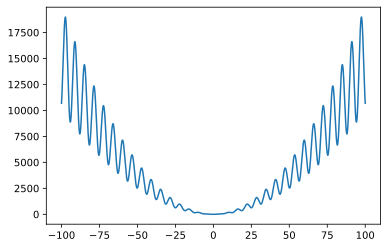

значение x = -1.248597908000141e-10 , значение f(x) = 1.5589967358623288e-20, количество итераций = 29196


In [59]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

epsilon = 10e-14
alpha_0 = 0.0004
delta = 0.001

    
x = np.linspace(-100, 100, 20000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()


class GradientDescent:
    def __init__(self, alpha, delta):
        self.alpha = alpha
        self.delta = delta

    def func_(self, x_0):
        return (x_0 ** 2)*(np.sin(0.5 * x_0) ** 2 + 1)

    def grad_(self, x_0):
#         return ((self.func_(x_0 + self.delta) - self.func_(x_0)) / delta)
        return (2*x_0*np.sin(0.5*x_0)**2 + 2*x_0 + ((x_0) ** 3) * np.cos(0.5*x_0)**2)

    def fit(self, x_0):
        iteration = 0
        x_new = x_0 
        while True:
            iteration += 1
            x_start = x_new
            x_new -= self.alpha*self.grad_(x_start)
            if iteration % 1000000 == 0:
                print(f'Итерация: {iteration}, x:{x_new}, f(x):{self.func_(x_new)}')
            if abs(x_start - x_new) < epsilon:
               break
        return x_new, iteration

x = GradientDescent(alpha_0, delta)
start_ = np.random.uniform(-100, 100)

var_, iter_ = x.fit(start_)
f_x = x.func_(var_)

print(f'значение x = {var_} , значение f(x) = {f_x}, количество итераций = {iter_}')

__При значении $\alpha > 0.0004$ оптимизация не выходит из локальных минимумов. При значении $\epsilon = 10\exp^{-14}$ оптимальное количество итераций $=(28000 - 29000)$__